# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing DataSet

In [2]:
df_hcl= pd.read_csv(r'E:\Handson Data Science\Share Martket Analysis\IT\HCLTECH.NS.csv', header=0, index_col='Date', 
                    parse_dates= True)
df_hcl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-12-09,23.937500,24.712500,23.568750,23.818750,16.017017,15792496.0
2002-12-10,23.549999,24.375000,23.043751,24.162500,16.248177,9235680.0
2002-12-11,24.500000,24.712500,23.518749,23.793751,16.000200,10511288.0
2002-12-12,23.862499,24.206249,23.456249,23.712500,15.945572,10864768.0
2002-12-13,23.750000,23.937500,22.924999,23.262501,15.642964,16367960.0


In [3]:
df_hcl.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-20,999.000000,1012.200012,969.349976,977.200012,977.200012,10216774.0
2021-07-22,970.000000,981.500000,970.000000,978.599976,978.599976,6156400.0
2021-07-23,984.700012,1003.900024,982.599976,994.000000,994.000000,5265839.0


In [4]:
df_hcl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4.618000e+03
mean,257.610548,261.122161,253.897625,257.473433,237.859504,4.892572e+06
std,239.499264,242.298847,236.536791,239.259715,236.697078,4.388181e+06
min,14.943750,15.250000,14.700000,14.862500,9.994351,0.000000e+00
25%,67.250000,68.578125,65.000000,67.001249,50.898133,2.460606e+06
50%,123.750000,125.262501,121.993752,123.587497,105.616024,3.727698e+06
75%,432.418754,437.000000,427.131241,432.412506,406.594704,5.847094e+06
max,1064.000000,1067.000000,1041.000000,1062.099976,1046.397339,8.030953e+07


In [5]:
df_hcl.shape

(4632, 6)

In [6]:
import matplotlib.dates as mdates
import datetime

# Visualization

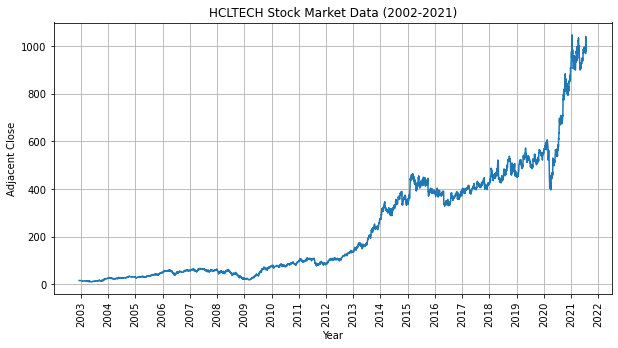

In [7]:
fig,ax=plt.subplots(figsize=(10,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)

plt.plot(df_hcl.index, df_hcl['Adj Close'])
plt.title('HCLTECH Stock Market Data (2002-2021)')
plt.xlabel('Year')
plt.ylabel('Adjacent Close')
plt.xticks(rotation=90)
plt.show()


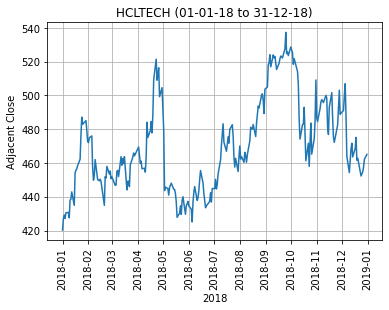

In [8]:
#will visualize monthly movement

hcl_18= df_hcl.loc[pd.Timestamp('2018-01-01'):pd.Timestamp('2018-12-31')]
plt.plot(hcl_18.index, hcl_18['Adj Close'])
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.title('HCLTECH (01-01-18 to 31-12-18)')
plt.xlabel('2018')
plt.ylabel('Adjacent Close')
plt.xticks(rotation=90)
plt.show()

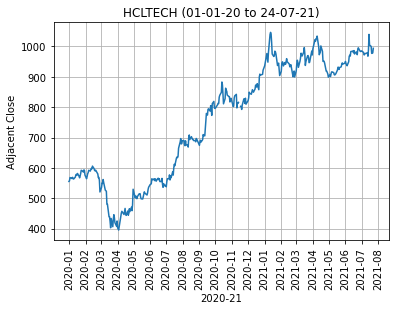

In [9]:
hcl_21= df_hcl.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2021-07-24')]
plt.plot(hcl_21.index, hcl_21['Adj Close'])
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.title('HCLTECH (01-01-20 to 24-07-21)')
plt.xlabel('2020-21')
plt.ylabel('Adjacent Close')
plt.xticks(rotation=90)
plt.show()

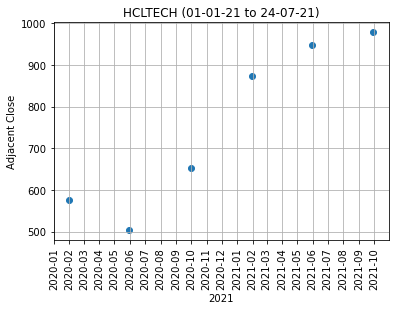

In [10]:
monthly_hcl= hcl_21.resample('4M').mean()
plt.scatter(monthly_hcl.index, monthly_hcl['Adj Close'])
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.title('HCLTECH (01-01-21 to 24-07-21)')
plt.xlabel('2021')
plt.ylabel('Adjacent Close')
plt.xticks(rotation=90)
plt.show()

# Analysing Difference between levels

In [14]:
df_hcl['diff']= df_hcl['Open']-df_hcl['Close']
hcl_diff= df_hcl.resample('W').mean()
hcl_diff.tail()

,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
2021-06-27,980.419995,992.250000,973.369995,984.070007,984.070007,3289450.60,-3.650012
2021-07-04,987.700000,992.190002,979.620007,984.509998,984.509998,2186012.00,3.190002
2021-07-11,977.740002,983.440002,969.019995,976.159986,976.159986,2774619.20,1.580017
2021-07-18,993.830005,1012.050000,979.189990,996.320007,996.320007,6154736.20,-2.490002
2021-07-25,989.675003,1003.975006,978.612488,987.500000,987.500000,6570903.25,2.175003


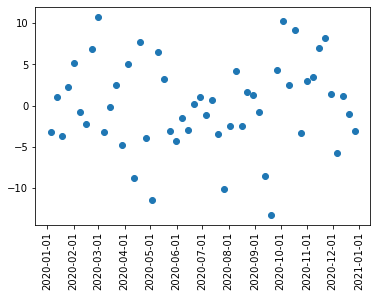

In [17]:
plt.scatter(hcl_diff.loc['2020-01-01':'2020-12-31'].index,hcl_diff.loc['2020-01-01':'2020-12-31']['diff'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.show()

In [18]:
daily_close_hcl= df_hcl[['Adj Close']]

daily_pct_change_hcl= daily_close_hcl.pct_change()

daily_pct_change_hcl.fillna(0, inplace=True)

daily_pct_change_hcl.head()

,Adj Close
Date,
2002-12-09,0.000000
2002-12-10,0.014432
2002-12-11,-0.015262
2002-12-12,-0.003414
2002-12-13,-0.018978


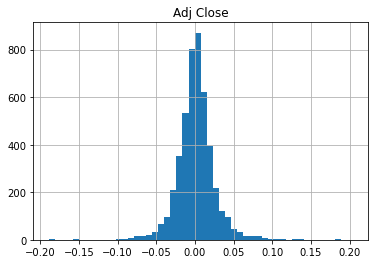

In [19]:
daily_pct_change_hcl.hist(bins=50)

plt.show()

In [21]:
min_periods= 75

#calculate the volaticity

vol= daily_pct_change_hcl.rolling(min_periods).std()*np.sqrt(min_periods)

vol.fillna(0, inplace=True)

vol.tail()

,Adj Close
Date,
2021-07-16,0.123208
2021-07-19,0.117152
2021-07-20,0.118694
2021-07-22,0.116936
2021-07-23,0.113827


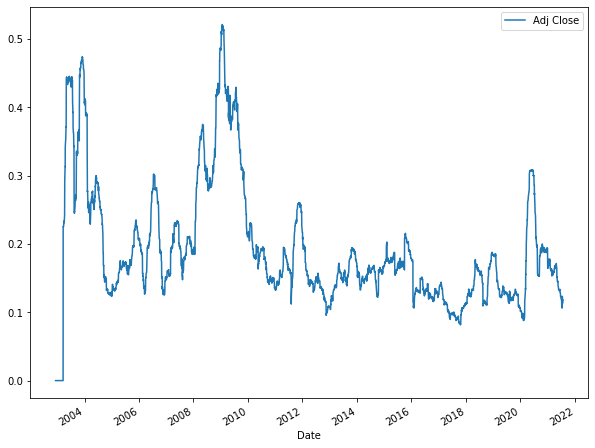

In [24]:
vol.plot(figsize=(10,8))

plt.show()

# Trends & Seasonality

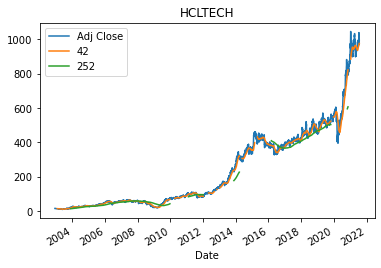

In [25]:
hcl_adj_close_px= df_hcl['Adj Close']

df_hcl['42']= hcl_adj_close_px.rolling(window=40).mean()

df_hcl['252']= hcl_adj_close_px.rolling(window=252).mean()
df_hcl[['Adj Close', '42', '252']].plot(title='HCLTECH')
plt.show()
